In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Importing data

In [3]:
advert_data = pd.read_csv("Downloads/Advertising.csv")
advert_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advert_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
advert_data.drop(['Unnamed: 0'], axis=1, inplace=True)

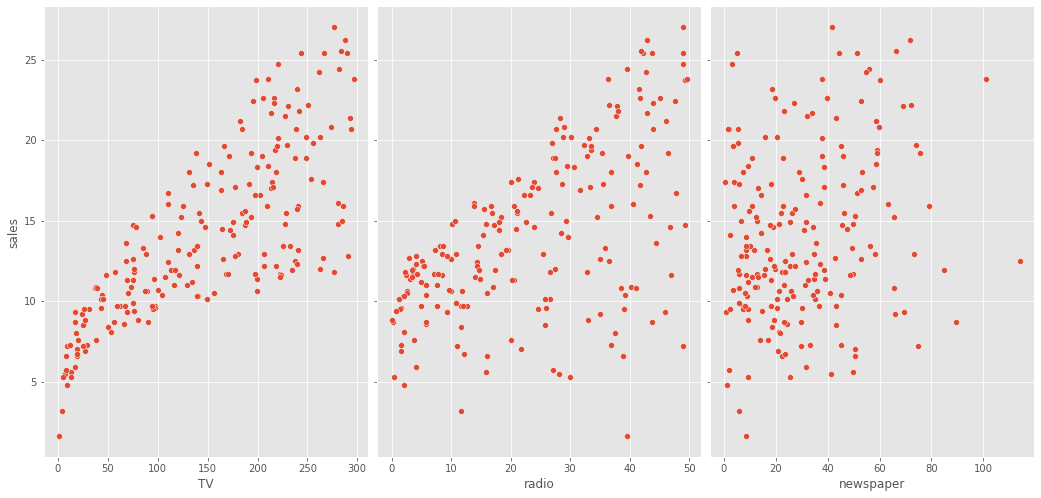

In [6]:
sns.pairplot(advert_data, x_vars=['TV', 'radio', 'newspaper'],
             y_vars='sales', height=7, aspect=0.7)

<AxesSubplot:>

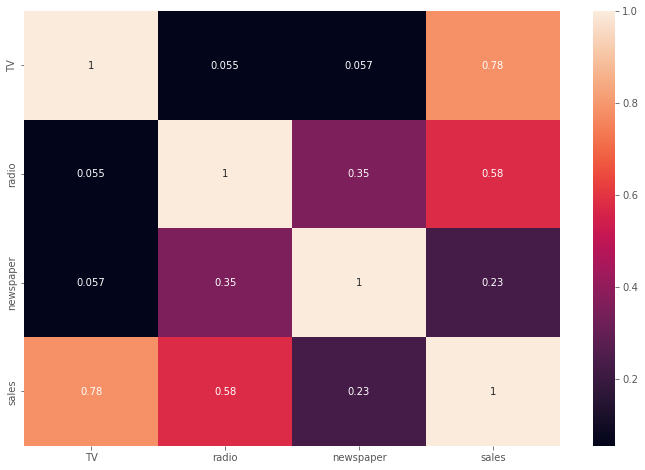

In [7]:
sns.heatmap(advert_data.corr(), annot=True)

### Features Selection

In [8]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = advert_data[['TV', 'radio', 'newspaper']]
y = advert_data.sales

In [9]:
model1 = LinearRegression().fit(X[['TV', 'newspaper']], y)
model1_preds = model1.predict(X[['TV', 'newspaper']])

print("R^2: ", r2_score(y, model1_preds))

R^2:  0.6458354938293271


In [10]:
model2 = LinearRegression().fit(X[['TV', 'radio']], y)
model2_preds = model2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, model2_preds))

R^2:  0.8971942610828956


In [11]:
model3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
model3_preds = model3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, model3_preds))

R^2:  0.8972106381789522


No effect of using newspaper feature on the R^2 value, so we can drop it.

#### Using different models like linear regression, decision tree, random forest  and XGBoost  to increase R^2 value

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = advert_data[['TV', 'radio', 'newspaper']]
y = advert_data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
LR = LinearRegression().fit(X_train, y_train)
LR_preds = LR.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, LR_preds)))
print("R^2: ", r2_score(y_test, LR_preds))

RMSE:  1.404651423032895
R^2:  0.9156213613792232


what if we drop the newspaper feature?

In [13]:
X = advert_data[['TV', 'radio']]
y = advert_data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
LR2 = LinearRegression().fit(X_train, y_train)
LR2_preds = LR2.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, LR2_preds)))
print("R^2: ", r2_score(y_test, LR2_preds))

RMSE:  1.3879034699382886
R^2:  0.9176214942248908


In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 

DTR = DecisionTreeRegressor().fit(X_train, y_train)
DTR_preds = DTR.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, DTR_preds)))
print("R^2: ", r2_score(y_test, DTR_preds))

RMSE:  0.7794870107962033
R^2:  0.9740155725238372


So the performance of model improved with the use of decision tree

In [15]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train, y_train)
RFR_preds = RFR.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, RFR_preds)))
print("R^2: ", r2_score(y_test, RFR_preds))

RMSE:  0.4992653202456568
R^2:  0.9893399758698925


Random Forest algorithm performed better than the decision tree algorithm

In [16]:
import xgboost as xgb
model = xgb.XGBRegressor()
XGB = model.fit(X_train, y_train)
XGB_preds = XGB.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, XGB_preds)))
print("R^2: ", r2_score(y_test, XGB_preds))

RMSE:  0.6216156176072869
R^2:  0.9834750854820399


#### So the best model to predict sales is Random Forest.